In [2]:
# Dependencies
from census import Census
# from config import  api_key
from config import nomics_key
from config import market_api
import gmaps
import numpy as np
import pandas as pd
import requests
import json
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import urllib.request


In [3]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=30d,365d&convert=&per-page=100&page=1"

response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "30d": {
            "market_cap_change": "-77015008741.14",
            "market_cap_change_pct": "-0.0656",
            "price_change": "-4173.28851380",
            "price_change_pct": "-0.0670",
            "volume": "1373620445218.32",
            "volume_change": "-178158512631.78",
            "volume_change_pct": "-0.1148"
        },
        "365d": {
            "market_cap_change": "754924523919.27",
            "market_cap_change_pct": "2.2100",
            "price_change": "39667.06859150",
            "price_change_pct": "2.1540",
            "volume": "22207983644650.72",
            "volume_change": "11344873298458.13",
            "volume_change_pct": "1.0443"
        },
        "circulating_supply": "18878506",
        "currency": "BTC",
        "first_candle": "2011-08-18T00:00:00Z",
        "first_order_book": "2017-01-06T00:00:00Z",
        "first_trade": "2011-08-18T00:00:00Z",
        "high": "67602.93030844",
        "high_timestamp": "2021-11-08T00

In [30]:
# Empty data to save retrieved data
name = []
price = []
rank = []
cap = []
high = []
ticker = []
year_price_change = []
year_pct_price_change = []
year_mktcap_change = []
year_pct_mktcap_change = []
set_index = 0
# For loop to retrieve data
for currency in response:
# Use try because not all data is complete
    try:
#       Retrieve each variable and save it in to the empty list
        name.append(response[set_index]["name"])
        ticker.append(response[set_index]['currency'])
        rank.append(response[set_index]['rank'])
        price.append(response[set_index]['price'])
        cap.append(response[set_index]['market_cap'])
        high.append(response[set_index]['high'])
    
        ypchange = response[set_index]['365d']['price_change']
        year_price_change.append(ypchange)
    
        yppchange = response[set_index]['365d']['price_change_pct']
        year_pct_price_change.append(yppchange)
    
        mpchange = response[set_index]['365d']["price_change"]
        year_mktcap_change.append(mpchange)
    
        mppchange = response[set_index]['365d']["price_change_pct"]
        year_pct_mktcap_change.append(mppchange)
        
# Add 1 to the index so it goes to the next currency
        set_index += 1
    
# Except to solve inexistent information, this information is a null
    except(KeyError):
        year_mktcap_change.append("")
        year_pct_mktcap_change.append("")
        set_index += 1
    
# Create new Data Frame with retrieved data
currency_df = pd.DataFrame({
    "Name": name,
    "Ticker": ticker,
    "Rank": rank,
    "Price": price,
    "Market Cap": cap,
    "High": high,
    "Year Price Change": year_price_change,
    "Year % Price Change": year_pct_price_change,
    "Year Market Cap Change": year_mktcap_change,
    "Year % Market Cap Change": year_pct_mktcap_change,})         


currency_df.style.format({"Price": "${:.2f}", 
                          "Market Cap": "${:.2f}", 
                          "High": "${:.2f}",
                          "Year Price Change":"${:}"})

currency_df.set_index('Name', inplace=True)
currency_df.head(10)

,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change,Year Market Cap Change,Year % Market Cap Change
Name,,,,,,,,,
Bitcoin,BTC,1,58082.97094065,1096519715401,67602.93030844,39667.06859150,2.1540,39667.06859150,2.1540
Ethereum,ETH,2,4251.90935753,503505367099,4811.20029542,3692.16843401,6.5962,3692.16843401,6.5962
Binance Coin,BNB,3,587.23882404,98736595240,677.12634098,557.21350870,18.5581,557.21350870,18.5581
Tether,USDT,4,1.00035453,73964158168,1.09097429,-0.0013464835,-0.0013,-0.0013464835,-0.0013
Solana,SOL,5,212.17035335,64423941187,259.03790999,210.01656851,97.5105,210.01656851,97.5105
Cardano,ADA,6,1.88971254,60596260594,2.96776063,1.74384431,11.9549,1.74384431,11.9549
XRP,XRP,7,1.07954065,50910030397,2.75789680,0.63329528,1.4192,0.63329528,1.4192
Polkadot,DOT,8,40.53724253,42872465250,368.57140373,35.02679346,6.3564,35.02679346,6.3564
USD Coin,USDC,9,1.00012096,34462259017,1.02995040,0.0015102562,0.0015,0.0015102562,0.0015


In [31]:
currency_df['Price'] = currency_df['Price'].astype('float64')
currency_df['Rank'] = currency_df['Rank'].astype('int')
currency_df['Market Cap'] = currency_df['Market Cap'].astype('float64')
currency_df['High'] = currency_df['High'].astype('float64')
currency_df['Year Price Change'] = currency_df['Year Price Change'].astype('float64')
currency_df['Year % Price Change'] = currency_df['Year % Price Change'].astype('float64')
currency_df['Year Market Cap Change'] = currency_df['Year Market Cap Change'].astype('float64')
currency_df['Year % Market Cap Change'] = currency_df['Year % Market Cap Change'].astype('float64')

currency_df.to_csv("all_crypto_currency.csv", index=False, header=True)
currency_df.dtypes

Ticker                       object
Rank                          int64
Price                       float64
Market Cap                    int64
High                        float64
Year Price Change           float64
Year % Price Change         float64
Year Market Cap Change      float64
Year % Market Cap Change    float64
dtype: object

In [28]:

top_price = currency_df['Price'].nlargest(n=5)
top_mCap = currency_df['Market Cap'].nlargest(n=5)
top_p_change = currency_df['Year Price Change'].nlargest(n=5)
top_pp_change = currency_df['Year % Price Change'].nlargest(n=5)
top_mc_change = currency_df['Year Market Cap Change'].nlargest(n=5)
top_mcp_change = currency_df['Year % Market Cap Change'].nlargest(n=5)

Text(0.5, 0, 'Currency')

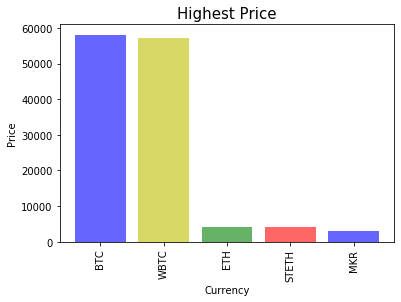

In [29]:
# Set variables to be charted
x_axis = top_price.index.values
y_axis = top_price.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.6, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Price")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

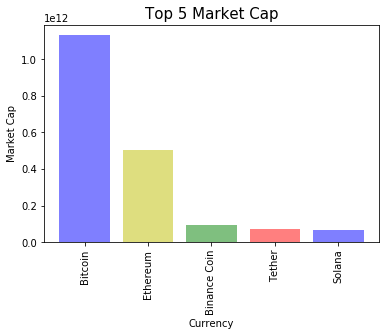

In [7]:
x = top_mCap
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Top 5 Market Cap", fontsize=15)
plt.ylabel("Market Cap")
plt.xlabel("Currency")

Text(0.5, 0, 'Currency')

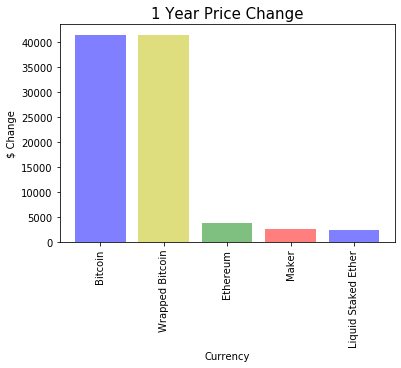

In [8]:
x = top_p_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Price Change", fontsize=15)
plt.ylabel("$ Change")
plt.xlabel("Currency")

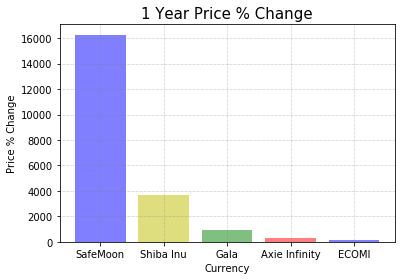

In [9]:
x = top_pp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5,)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Price % Change", fontsize=15)
plt.ylabel("Price % Change")
plt.xlabel("Currency")
plt.xticks(rotation=0)
plt.style.use('seaborn-pastel')
plt.grid(linestyle=':', linewidth='0.5', color='grey')
plt.savefig('1 Year Price % Change.png')

Text(0.5, 0, 'Currencies')

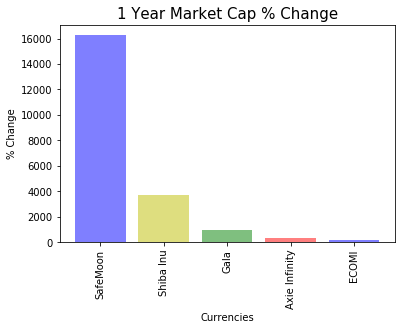

In [10]:
x = top_mcp_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("1 Year Market Cap % Change", fontsize=15)
plt.ylabel("% Change")
plt.xlabel("Currencies")

Text(0.5, 0, 'Price')

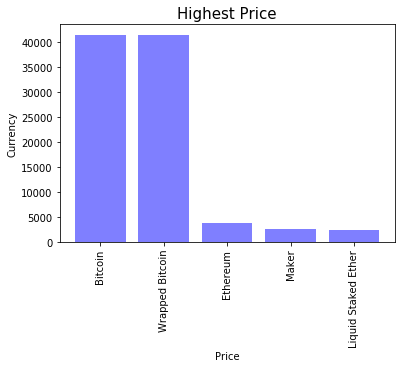

In [11]:
x = top_mc_change
# Set variables to be charted
x_axis = x.index.values
y_axis = x.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Currency")
plt.xlabel("Price")

In [11]:
currency_list = []
answer = "yes"
while answer == "yes":
    q_divider = input("Do you have a particular currency you are interested in? (yes/no)")
    if q_divider == "yes":
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"

    elif q_divider == "no":
        print("This are the all the possibilities: ")
        index = 0
        for x in response:
            print(response[index]['name'])
            index += 1
        answer = input("Are you interested in any of this (yes/no)")
        more = "yes"
        while more == "yes":
            currency = input("please insert the name of a currency your are interested in: ")
            currency_list.append(currency)
            more = input("Are you interested in any other currency? ")
        answer = "no"
    else:
        print("I'm sorry, that is not a valid answer ... ")
        print("Ok, let's start again")
print(f"Ok, the currencies you are interested in are {currency_list}")

Do you have a particular currency you are interested in? (yes/no)yes
please insert the name of a currency your are interested in: Elrond
Are you interested in any other currency? yes
please insert the name of a currency your are interested in: Stellar
Are you interested in any other currency? yes
please insert the name of a currency your are interested in: Decred
Are you interested in any other currency? TRON
Ok, the currencies you are interested in are ['Elrond', 'Stellar', 'Decred']


In [35]:
choice_df = pd.DataFrame({})

In [37]:
for currency in currency_list:
    actual = currency_df.loc[currency_df.index == currency]
    choice_df = choice_df.append(actual)

In [38]:
choice_df

,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change,Year Market Cap Change,Year % Market Cap Change
Name,,,,,,,,,
Elrond,EGLD,32,356.987285,7175110281,358.781337,348.953739,43.4371,348.953739,43.4371
Stellar,XLM,28,0.343509,8346469595,0.899460,0.239239,2.2944,0.239239,2.2944
Decred,DCR,95,107.328030,1450476622,246.065393,85.415624,3.8980,85.415624,3.8980


Of this choices this years best investment would have been: Elrond


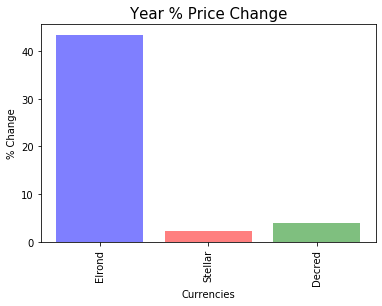

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set variables to be charted
 
x_axis = choice_df.index
y_axis = choice_df["Year % Price Change"].values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''r''g''y', alpha=0.5, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Year % Price Change", fontsize=15)
plt.ylabel("% Change")
plt.xlabel("Currencies")

column = choice_df['Year % Price Change']
max_index = column.idxmax()
print(f"Of this choices this years best investment would have been: {max_index}")

In [68]:
amount = float(input("How much would you have invested? "))
max_change = choice_df['Year % Price Change'].max()
revenue = amount * max_change
print(f"You would have made ${revenue}")

How much would you have invested? 1000
You would have made $43437.1
